# Import libraries

In [1]:
# Comment our this code if not needed
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#####
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#####
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#####
from sklearn import metrics
#####
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
####
import warnings

# Import the data and make data frame

In [4]:
# import the data
data = pd.read_csv('data/dataset.csv')
# make data Frame
df = pd.DataFrame(data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Machin cannot understand the format of CCAvg so we chang that to float type

In [5]:
df['CCAvg'] = df['CCAvg'].astype(str).str.replace('/', '.')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Experience cannot be negative so, we change that to abs of itself  

In [6]:
df.Experience = abs(df.Experience)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Check the amount of missing value

In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

well, the data haven't any missing value

# Correlation

In [8]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


# Correlation plot

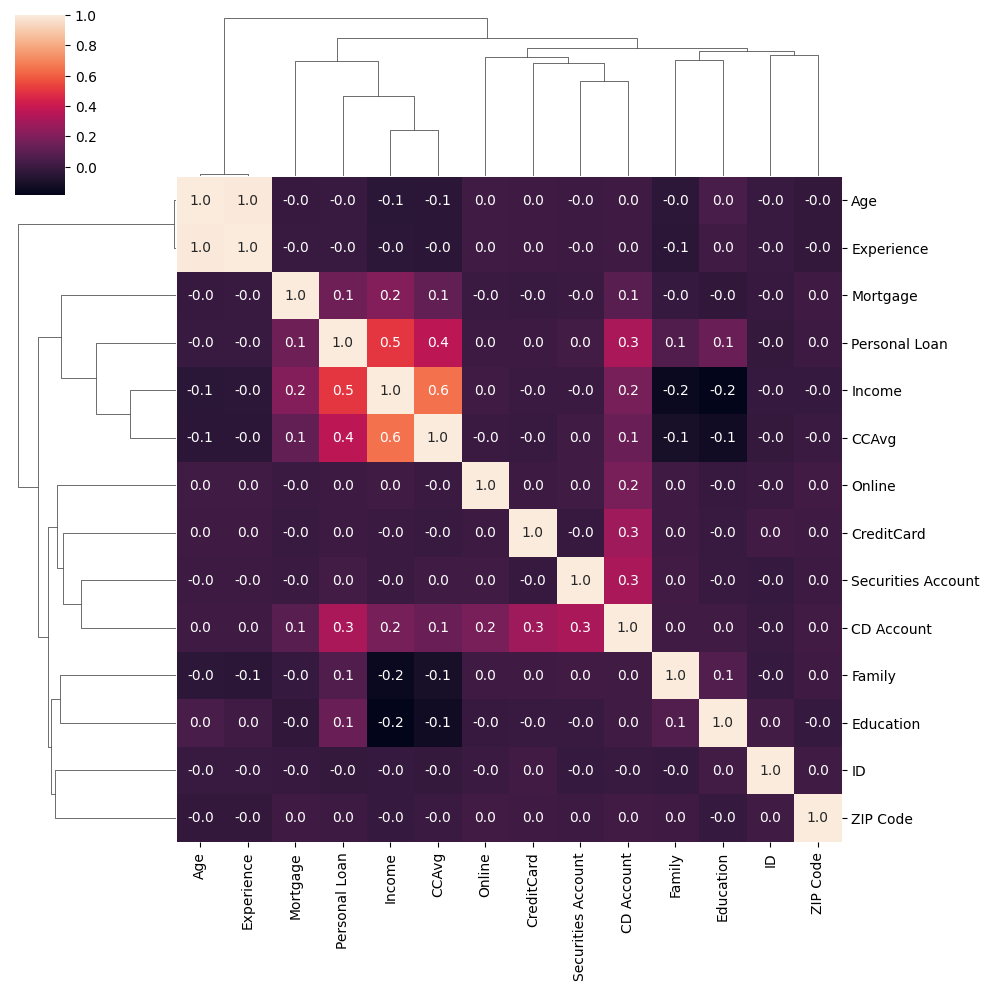

In [9]:
sns.clustermap(df.corr(),annot=True, fmt=".1f")

# Check the amount of data in each column (feature)

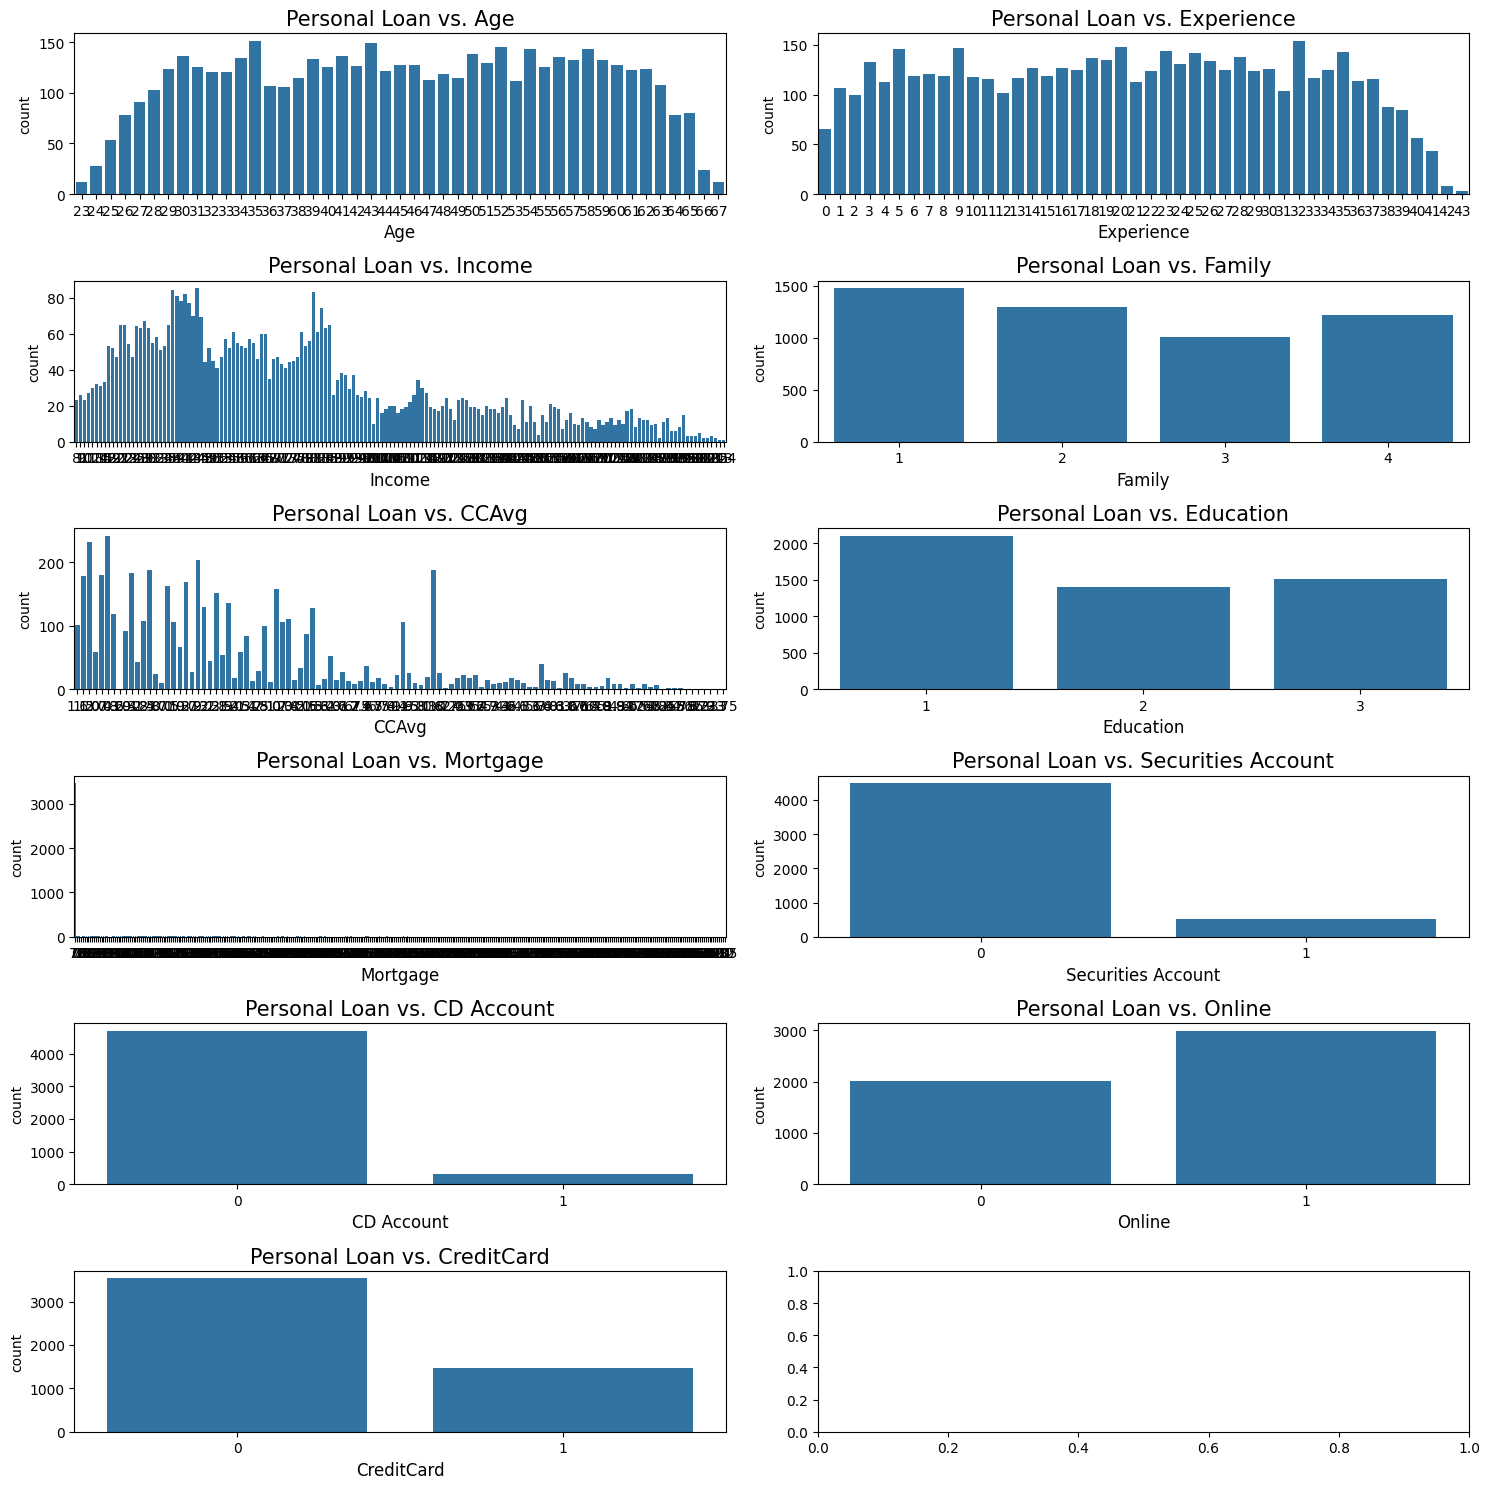

In [10]:
featuresAndTarget = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account'
                     ,'CD Account' ,'Online' , 'CreditCard' ]
features = ['Age',
            'Experience',
            'Income',
            'Family',
            'CCAvg',
            'Education',
            'Mortgage',
            'Securities Account',
            'CD Account',
            'Online',
            'CreditCard']

target = 'Personal Loan'

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,15), dpi=100)

for i in range(len(features)):
    x = i//2
    y = i%2
    sns.countplot(x=features[i] , data=df , ax=ax[x,y])
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)

plt.tight_layout()

# Drow scatterplot

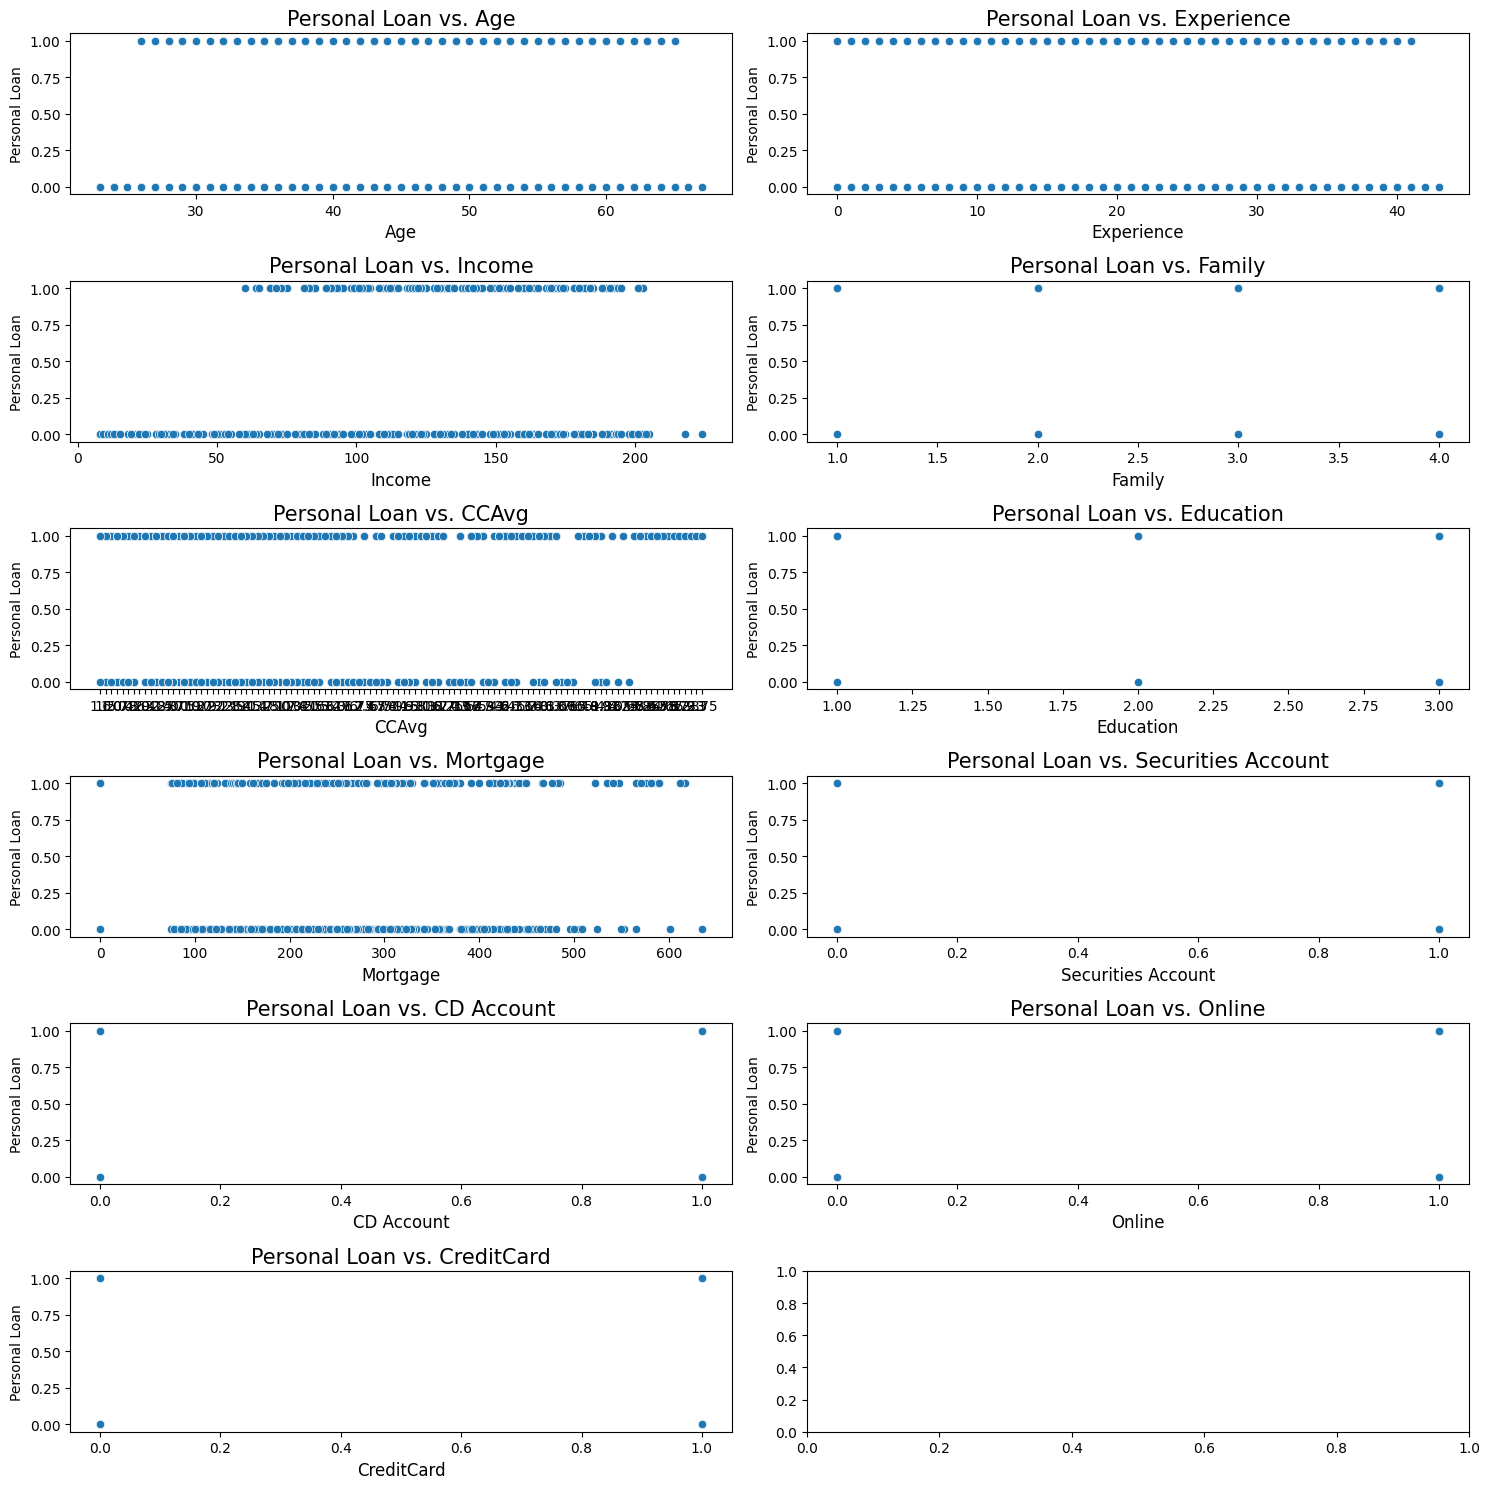

In [11]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,15), dpi=100)

for i,var in enumerate(features):
    x = i//2
    y = i%2
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    sns.scatterplot(data=df, x=var , y=df['Personal Loan'], ax=ax[x,y])
plt.tight_layout()

## categrical features

In [12]:
categrical = ['Age','Experience', 'Income', 'Family']

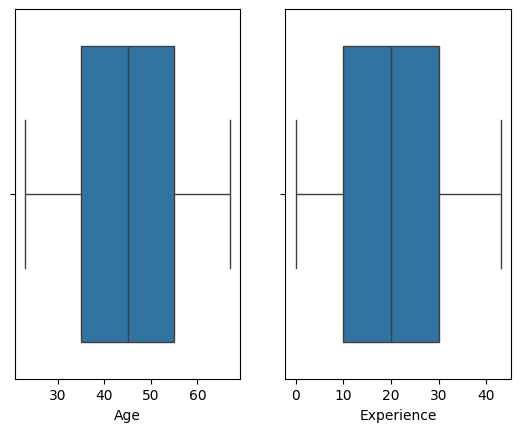

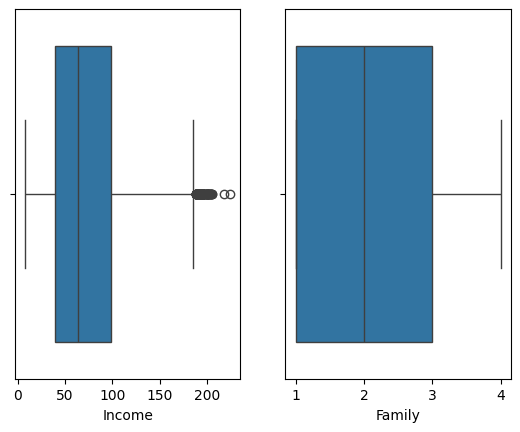

In [13]:
i=0
while i<4:   
    
    plt.subplot(1,2,1)
    sns.boxplot(x=categrical[i] , data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=categrical[i] , data=df)
    i += 1
    
    plt.show()

# We have noise in Income feature and we should remove those 
### Noises find by box plot in upper cell

<Axes: xlabel='Income'>

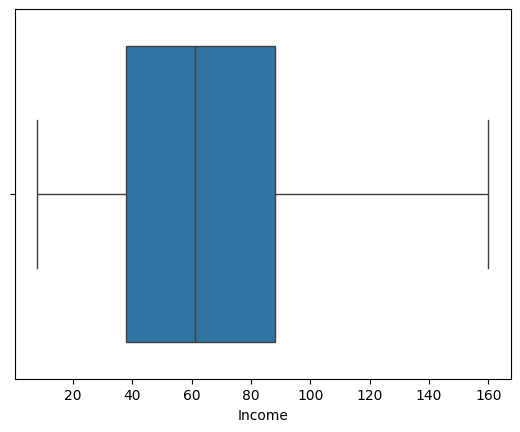

In [14]:
df1 = df[df['Income']>160].index
df = df.drop(df1)
sns.boxplot(x='Income' , data=df)

# Make predictor model :  LogisticRegression


# We first prepare the preparations


## first we apart features and target and use train_test_split  then we will make a class for evaluation 

In [15]:
#Features
x = df.drop('Personal Loan' , axis=1) 
#Target
y = df['Personal Loan']
#Prepare the train data and test data and the size for testing
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=0)

## Shape of x_train , x_test & y_train , y_test

In [16]:
print('x_train shape : ' , x_train.shape)
print('x_test shape : ' , x_test.shape)
print('y_train shape : ' , y_train.shape)
print('y_test shape : ' , y_test.shape)

x_train shape :  (3265, 13)
x_test shape :  (1400, 13)
y_train shape :  (3265,)
y_test shape :  (1400,)


## make a classes foe evaluation method

## 1- Make LogisticRegression model

### do scaling for x_train and x_test

In [17]:
Scaler = StandardScaler()
x_train_scaled = Scaler.fit_transform(x_train)
x_test_scaled = Scaler.transform(x_test)

In [18]:
LR = LogisticRegression()
LR.fit(x_train_scaled,y_train)
y_pred = LR.predict(x_test_scaled)
LR_score = metrics.accuracy_score(y_test,y_pred)
print('accuracy_score : ' , LR_score)

accuracy_score :  0.9635714285714285


In [ ]:
# Source: https://www.kaggle.com/code/momidjafari/predict-bank-personal-loan